## MVP de Machine Learning e Analytics

**Nome:** Mateus Maracaja Tabach

**Matrícula:** 4052025000370

**Dataset:** [Global Renewable Energy Production](https://www.kaggle.com/datasets/ahmedgaitani/global-renewable-energy)



## Definição do Problema

O objetivo deste trabalho é analisar e prever a evolução da produção de energia renovável em diferentes países entre os anos de 2000 e 2023.  


# Descrição do Problema


A transição energética é um tema central no contexto de mudanças climáticas.  
Este trabalho pretende explorar dados de produção de energia renovável (solar, eólica, hidrelétrica, biomassa, entre outras) para:  
1. Avaliar a evolução da participação dessas fontes por país.  
2. Calcular indicadores de diversificação energética.  
3. Construir modelos preditivos para estimar a evolução da produção até 2030.  

## Hipóteses do Problema

As hipóteses traçadas são as seguintes:

- Países com maior investimento em energia renovável (ex.: Alemanha, China) apresentarão taxas de crescimento mais aceleradas.  
- Fontes como solar e eólica terão crescimento mais consistente em comparação a hidrelétrica, que já se encontra consolidada.  
- Modelos de regressão linear simples podem capturar tendências gerais, mas métodos mais robustos podem gerar previsões mais precisas.  


## Tipo de Problema

Trata-se de um **problema de regressão e séries temporais**, no qual se busca estimar a tendência de crescimento de fontes renováveis ao longo do tempo e avaliar a **diversificação da matriz energética**.

## Seleção de Dados

O dataset selecionado já está pronto para uso.

## Atributos do Dataset

O dataset Global Renewable Energy Production contém 240 amostras, com dez países tendo sua matriz energética renovável análisada. Possui sete atributos:

- Year (ano de análise)
- Country (país analisado)
- SolarEnergy (energia solar produzida)
- WindEnergy (energia eólica produzida)
- HydroEnergy (energia hidrelétrica)
- OtherRenewableEnergy (outras fontes renováveis)
- TotalRenewableEnergy (total consolidado de todas as fontes renováveis)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset escolhido.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import zscore
RANDOM_SEED = 42
import numpy as np, random, time
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)


url = 'https://raw.githubusercontent.com/mateustabach/EntregasPUC/refs/heads/main/global_renewable_energy_production.csv'
df = pd.read_csv(url)

In [ ]:
# primeiras linhas
df.head()

,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
0,2000,USA,437.086107,1435.928598,1544.389701,319.396318,3736.800724
1,2001,USA,240.416776,402.792876,398.742141,439.779266,1481.731059
2,2002,USA,641.003511,1120.494351,334.993640,486.459433,2582.950935
3,2003,USA,849.198377,476.040844,609.102444,132.532029,2066.873694
4,2004,USA,373.818019,882.183361,1034.306532,181.053113,2471.361025


In [ ]:
# Verificar e padronizar types
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
print("Year min/max:", df['Year'].min(), df['Year'].max())


target_col = "TotalRenewableEnergy"
assert target_col in df.columns, f"Coluna alvo {target_col} não encontrada. Corrija target_col."

Year min/max: 2000 2023


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset selecionado possui 240 instâncias, sendo 24 instâncias para cada um dos dez países, uma por ano. As seis características de medição são de tipo numérico, sendo 5 float e "Year" é int, enquanto o atributo "Country" é categórico.

In [ ]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())


Total de instâncias: 240

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  240 non-null    int64  
 1   Country               240 non-null    object 
 2   SolarEnergy           240 non-null    float64
 3   WindEnergy            240 non-null    float64
 4   HydroEnergy           240 non-null    float64
 5   OtherRenewableEnergy  240 non-null    float64
 6   TotalRenewableEnergy  240 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.3+ KB
None


## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# estatísticas descritivas básicas do dataset
df.describe()

,Year,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2011.500000,528.523858,857.133260,1076.581975,287.127554,2749.366647
std,6.936653,271.183089,375.020314,499.981598,128.460792,695.126957
min,2000.000000,104.555425,206.021630,320.662607,54.876943,910.381025
25%,2005.750000,284.700505,523.572495,593.796081,176.322725,2250.759951
50%,2011.500000,533.436429,882.024084,1046.390380,291.398276,2815.458943
75%,2017.250000,766.701662,1160.199295,1495.160715,405.479393,3217.212712
max,2023.000000,996.973153,1487.070005,1983.858741,499.872953,4628.164753


## Descrição do Dataset

O dataset "Global Renewable Energy Production" possui registros anuais de produção de energia renovável entre 2000 e 2023, cobrindo múltiplos países e diferentes fontes energéticas.  

- **Período**: 2000–2023.  
- **Atributos principais**:  
  - `Country`: país de referência.  
  - `Year`: ano da medição.  
  - `Source`: tipo de energia renovável (solar, eólica, hidrelétrica, biomassa, geotérmica etc.).  
  - `Production`: produção de energia em TWh (terawatts-hora).  

**Observações**:  
- O dataset é multivariado (países × anos × fontes).  
- Existem valores ausentes para alguns países/fontes em determinados anos.  
- A distribuição é desigual: países desenvolvidos têm mais registros e maior volume de produção.  

### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [ ]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
Year,2011.500000
SolarEnergy,528.523858
WindEnergy,857.133260
HydroEnergy,1076.581975
OtherRenewableEnergy,287.127554
TotalRenewableEnergy,2749.366647


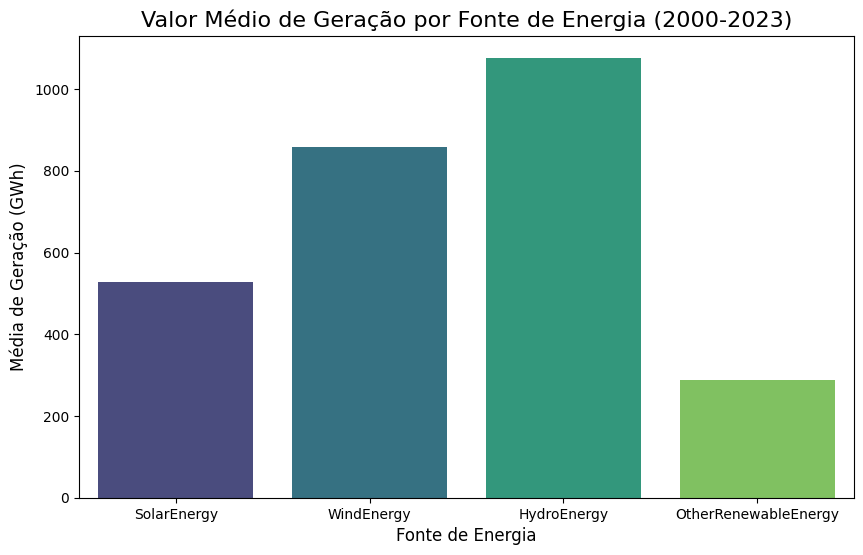

In [ ]:
# criando a lista de fontes
energy_columns = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy']
df_energy = df[energy_columns]

# cálculo da média
mean_values = df_energy.mean()

# gerando o gráfico
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x=mean_values.index,
    y=mean_values.values,
    hue = mean_values.index,
    palette='viridis',
    legend = False
)


# rotulos do gráfico
plt.title('Valor Médio de Geração por Fonte de Energia (2000-2023)', fontsize=16)
plt.xlabel('Fonte de Energia', fontsize=12)
plt.ylabel('Média de Geração (GWh)', fontsize=12)

# plotando o gráfico
plt.show()

Conseguimos identificar que a energia hidrelétrica é a nossa principal fonte renovável, porém, a energia eólica não fica tão atrás. Seguida da solar e, por último, das não especificadas.

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
Year,6.936653
SolarEnergy,271.183089
WindEnergy,375.020314
HydroEnergy,499.981598
OtherRenewableEnergy,128.460792
TotalRenewableEnergy,695.126957


## Gráfico para mostrar o desvio padrão

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Year'),
  Text(1, 0, 'SolarEnergy'),
  Text(2, 0, 'WindEnergy'),
  Text(3, 0, 'HydroEnergy'),
  Text(4, 0, 'OtherRenewableEnergy'),
  Text(5, 0, 'TotalRenewableEnergy')])

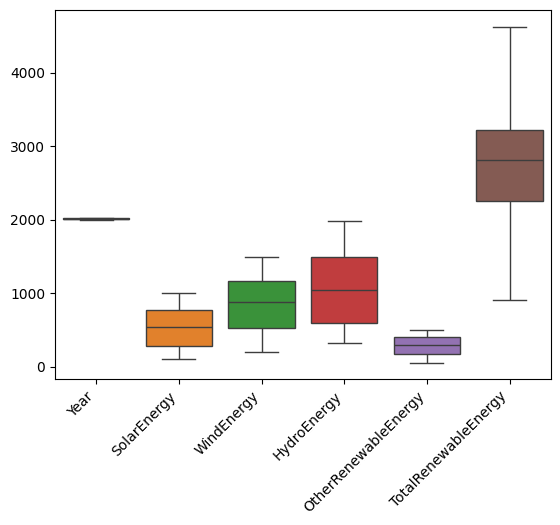

In [ ]:
#o melhor gráfico para mostrar o desvio padrão é o boxplot. É compacto, robusto contra outliers e ótimo para comparações.
#nele podemos ver a variação dos dados claramente, a mediana, os pontos mais altos, baixos e outliers de cada atributo.
sns.boxplot(data = df)
plt.xticks(rotation = 45, ha='right')


O nosso boxplot mostra um desvio padrão alto para todas as fontes de energia e para a produção total. Isso expõe uma grande variância na geração, seja absoluta, ou por fonte.


## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

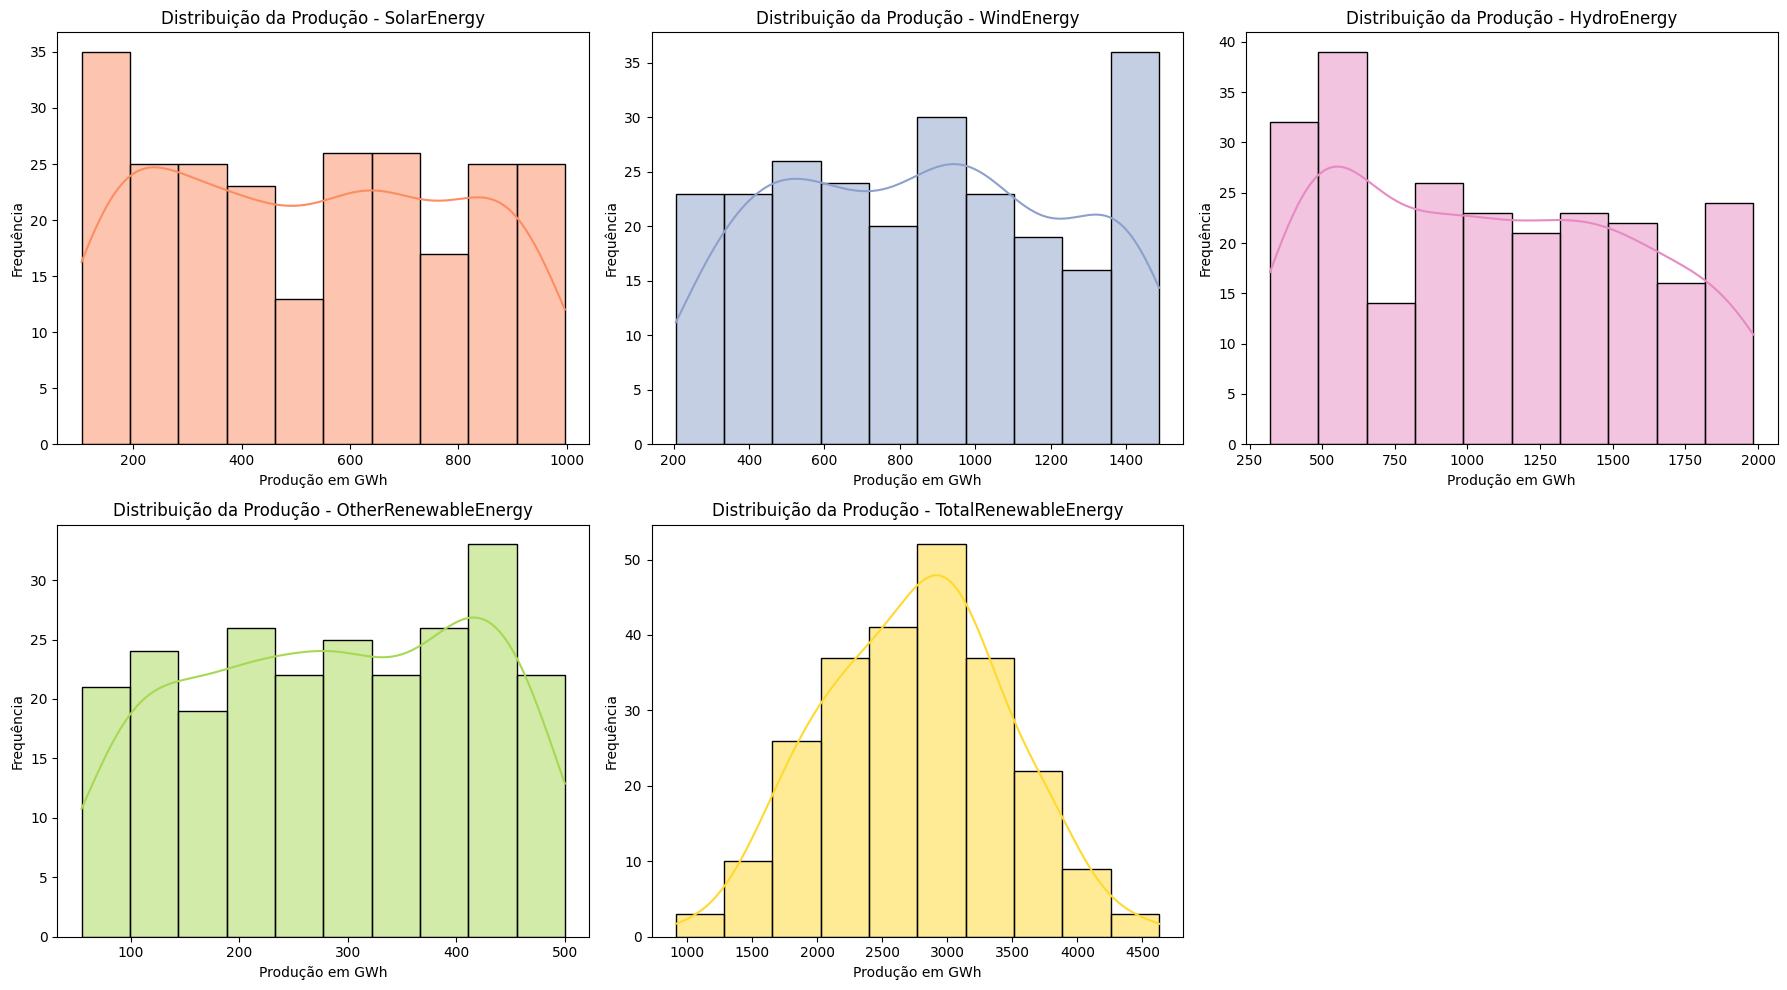

In [ ]:
# lista de colunas de energia renovável
colunas_energia = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy', 'TotalRenewableEnergy']

# paleta de cores para os gráficos
paleta = sns.color_palette('Set2')

# tamanho total do painel
plt.figure(figsize=(18, 10))

# for loop pelos atributos de energia
for i, coluna in enumerate(colunas_energia, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=coluna, kde=True, bins=10, color=paleta[i % len(paleta)], edgecolor='black')
    plt.title(f'Distribuição da Produção - {coluna}', fontsize=12)
    plt.xlabel('Produção em GWh')
    plt.ylabel('Frequência')

# ajuste de layout
plt.tight_layout()
plt.show()

O conjunto de histogramas nos aponta para algumas conclusões. Energia solar tem seu pico de frequência próximo ao valor mais baixo de geração, Próximo a 200 GWh. Já energia eólica tem seu pico no valor mais alto, em torno de 1400 GWh. Hidrelétrica e outras também apontam picos esporádicos, Hidrelétrica entre os valores mais baixos apresentados e Outras entre os mais altos.

A grande conclusão está Total gerado. Claramente conseguimos ver que o total gerado por ano gira, em sua esmagadora maioria, entre 2000 e 3500 GWh.

## Boxplot

Para entender as diferenças de produção ano a ano, devemos olhar como se comportam os valores quando agrupadas por fonte energética. Isso nos permite comparar a média, mediana e desvio padrão de cada uma, além de visualizar suas distribuições por meio de boxplots.


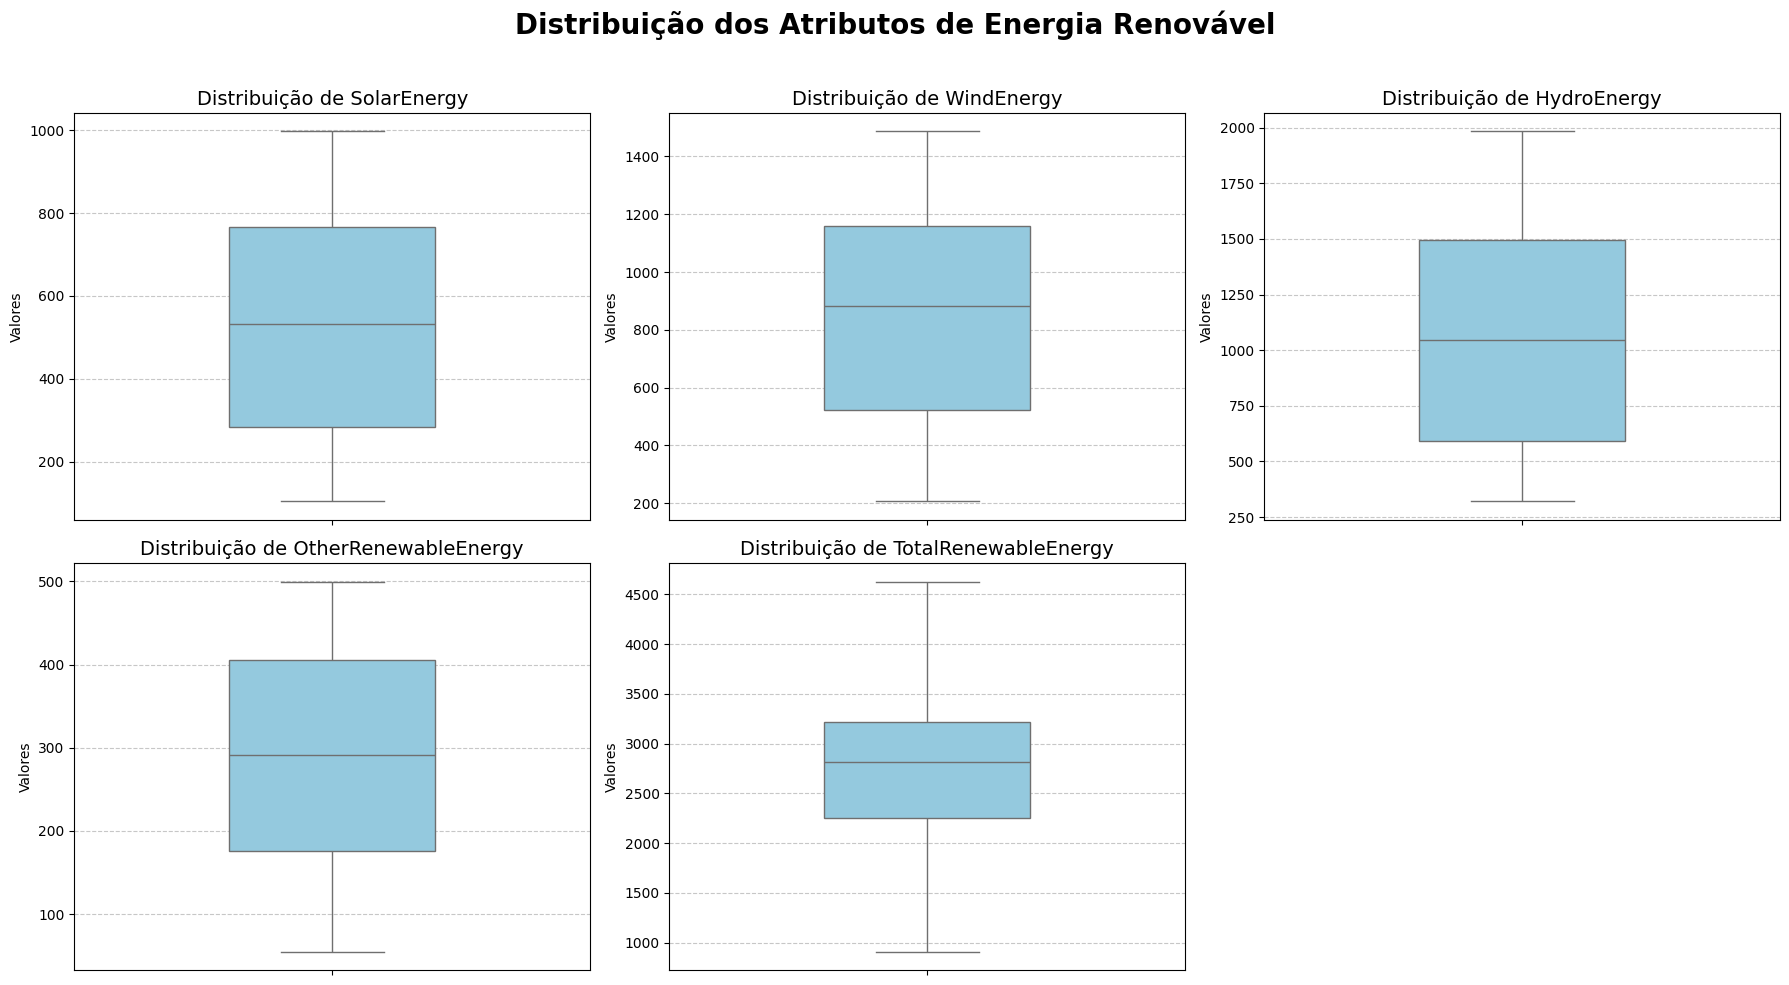

In [ ]:
colunas_energia = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy', 'TotalRenewableEnergy']


colunas_existentes = [col for col in colunas_energia if col in df.columns]

# cria uma figura e uma grade de subplots (2 linhas, 3 colunas)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# adiciona um título geral para toda a figura
fig.suptitle('Distribuição dos Atributos de Energia Renovável', fontsize=20, fontweight='bold')


# loop para criar cada boxplot

# facilitando o loop com .flatten
axes_flat = axes.flatten()

for i, coluna in enumerate(colunas_energia):
    ax_atual = axes_flat[i] # pega o subplot (eixo) atual da lista

    # desenha um único boxplot no eixo atual
    # usamos y=coluna para mostrar a distribuição dos valores daquela coluna
    sns.boxplot(data=df, y=coluna, ax=ax_atual, color= 'skyblue', width=0.4)

    # personalizando cada subplot pela coluna que ele irá mosrtar
    ax_atual.set_title(f'Distribuição de {coluna}', fontsize=14)
    ax_atual.set_xlabel('') # Remove o rótulo do eixo X, pois não há categorias
    ax_atual.set_ylabel('Valores', fontsize=10)
    ax_atual.grid(axis='y', linestyle='--', alpha=0.7)

# ocultando o sexto gráfico
for i in range(len(colunas_energia), len(axes_flat)):
    axes_flat[i].axis('off')

# calibrando layout e usando plt.show para mostrar
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


O conjunto de boxplots nos dá a oportunidade de olharmos para todos os gráficos e analisarmos a variação em cada um. De cara, conseguimos ver que o Total produzido geralmente fica bem estável, independente do ano.

As 3 fontes renováveis que aparecem nominalmente tem uma variação enorme de produção a depender do ano acompanhado.

# Entendendo a força dos países em cada uma das fontes de energia analisadas

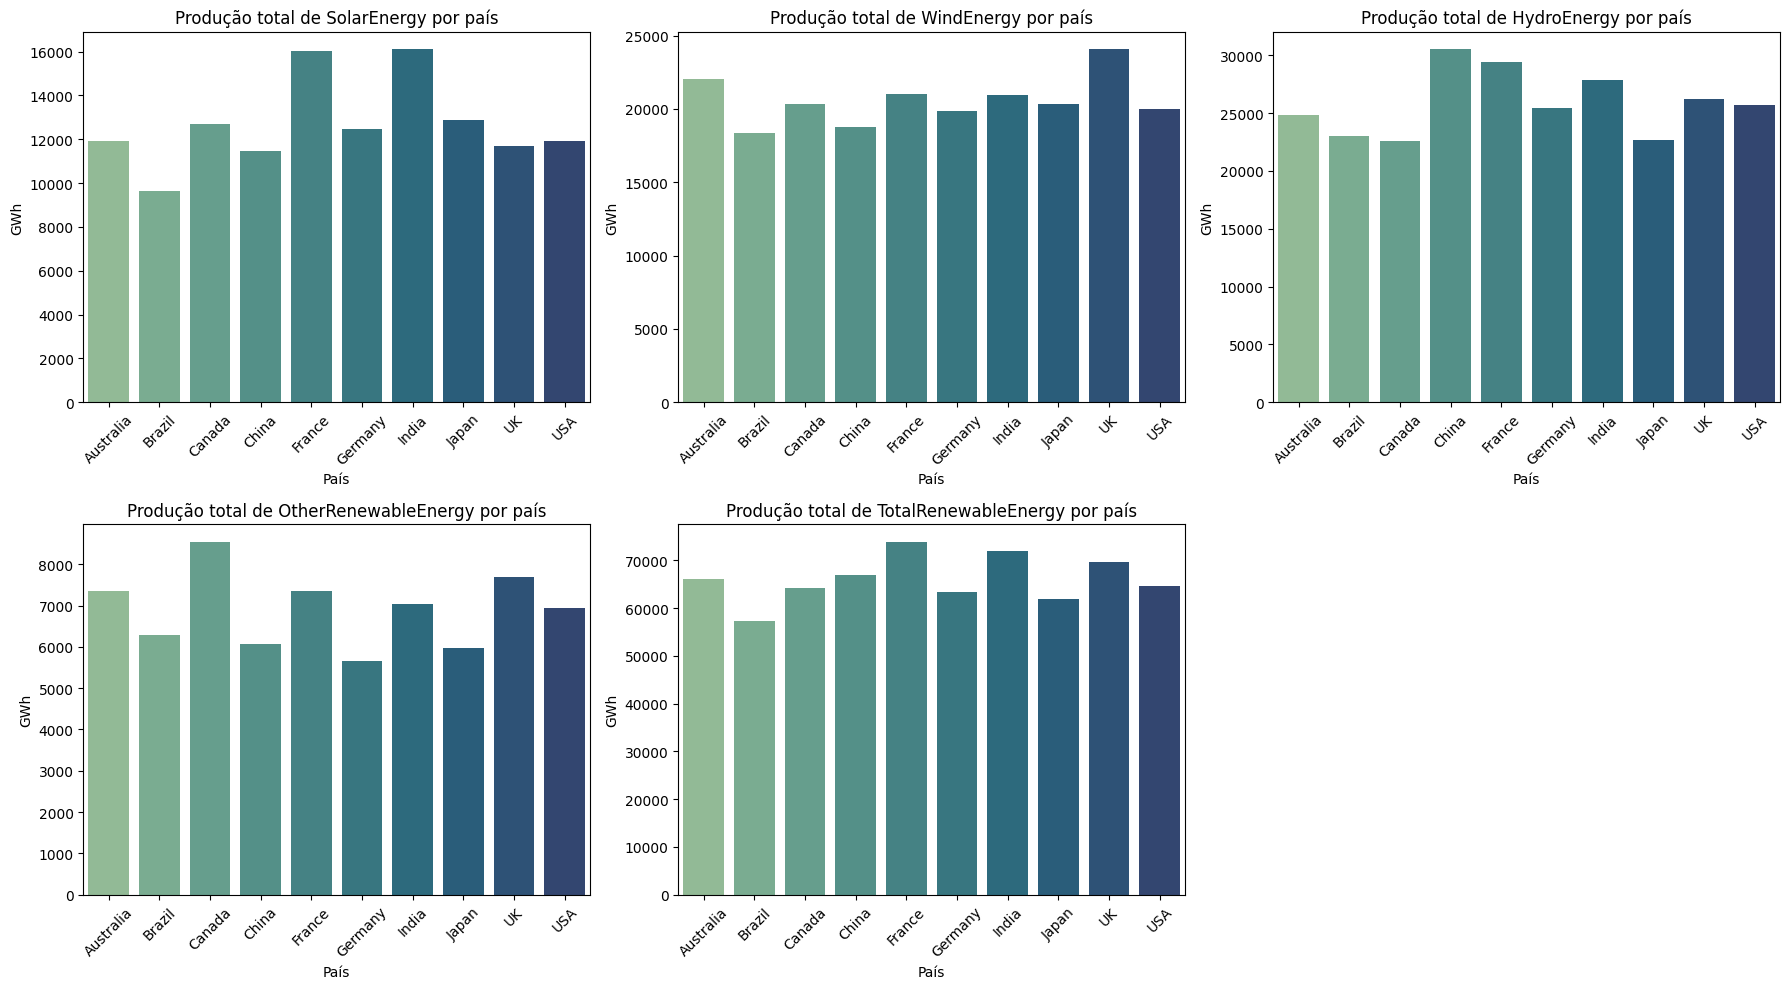

In [ ]:
# lista de fontes renováveis analisadas e a soma das partes
energy_sources = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy', 'TotalRenewableEnergy']

# agrupar por país e somar a produção ao longo dos anos
df_grouped = df.groupby('Country')[energy_sources].sum().reset_index()

# criar uma grade de 2 linhas por 3 colunas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# criar um gráfico para cada tipo de energia
for i, energy in enumerate(energy_sources):
    sns.barplot(data=df_grouped, x='Country', y=energy, hue='Country', ax=axes[i], palette='crest', legend = False)
    axes[i].set_title(f'Produção total de {energy} por país', fontsize=12)
    axes[i].set_ylabel('GWh')
    axes[i].set_xlabel('País')
    axes[i].tick_params(axis='x', rotation=45)

# remover o sexto gráfico (último slot da grade)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Alguns insights rápidos que conseguimos fazer com as informações dessa grade de gráficos são:

A França foi a maior geradora de energia do grupo desde 2000. Enquanto isso, o Brasil foi o menor.

A indústria de geração de energia hidrelétrica chinesa é a maior responsável por geração entre todas as indústrias analisadas com mais de 30.000 GWh em 23 anos. Nenhum outro país conseguiu, com apenas uma fonte, gerar mais do que os chineses com suas hidrelétricas.

## Evolução de cada fonte energética por país e ano

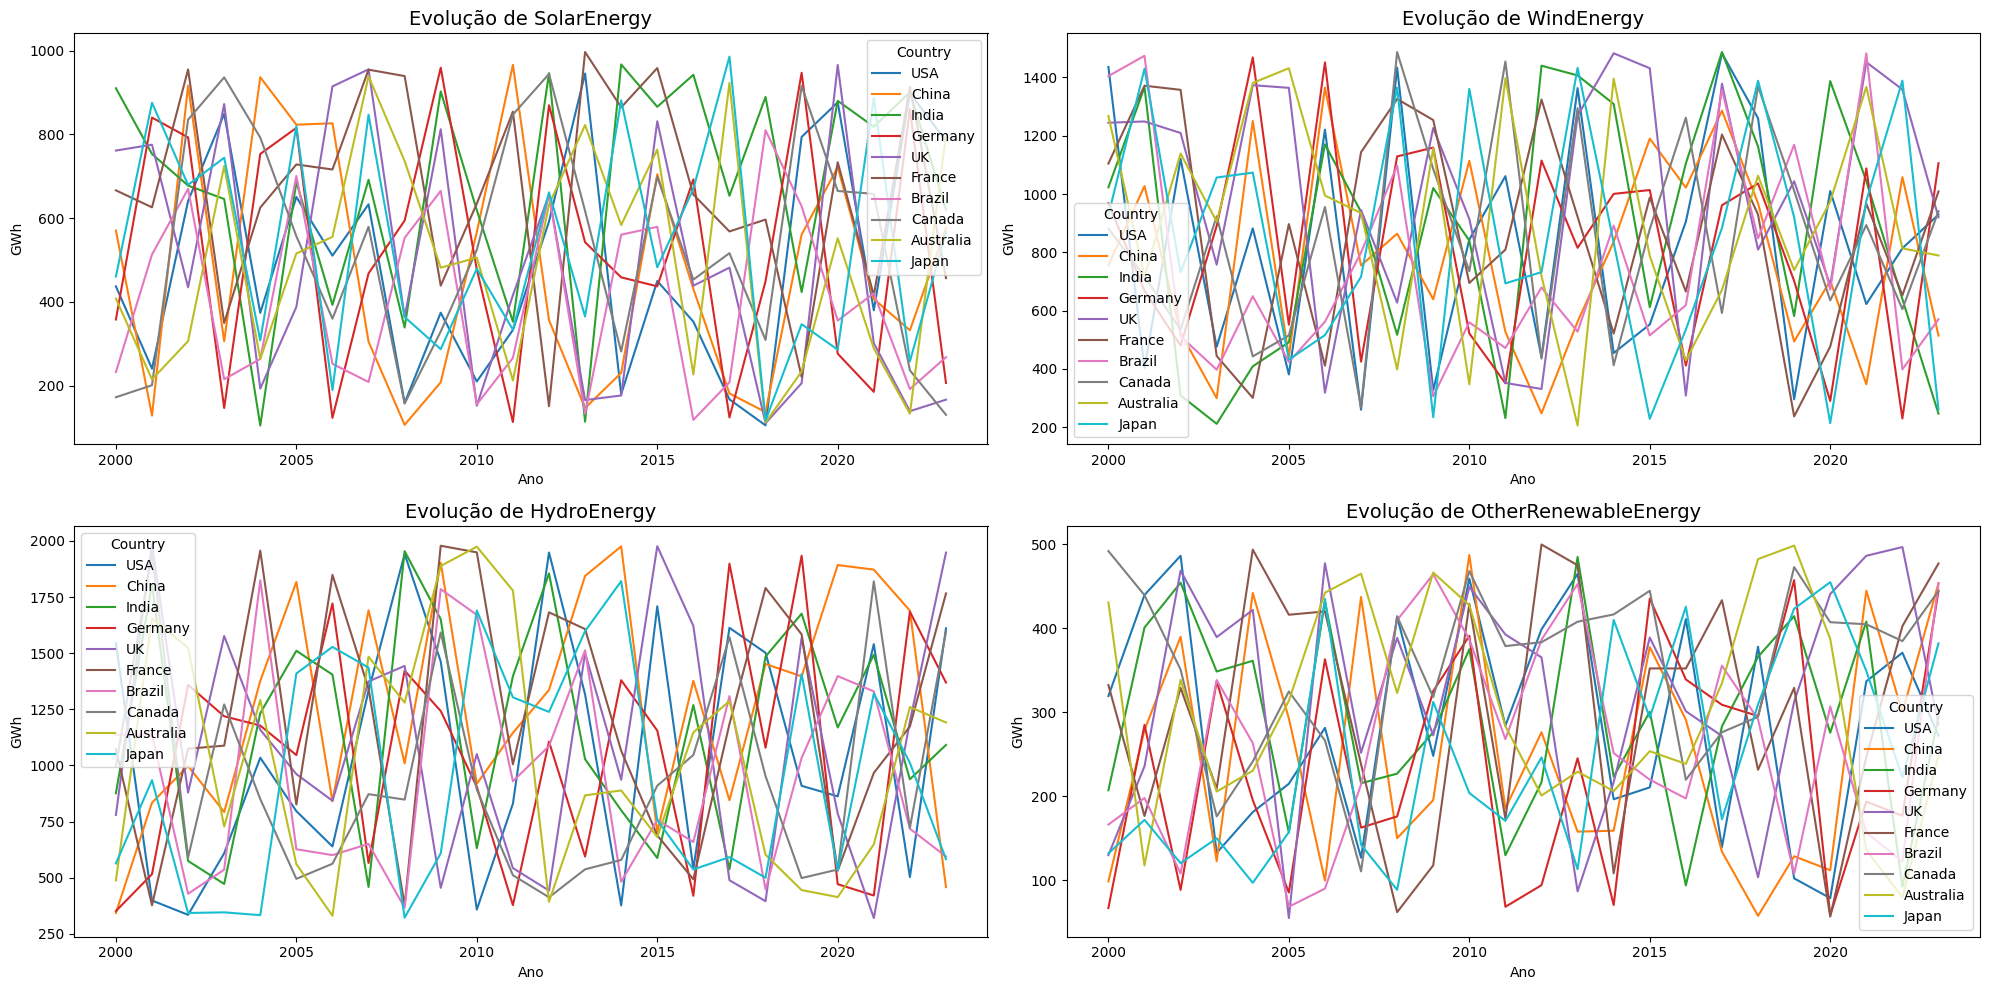

In [ ]:
# fontes de energia
energy_types = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy']
palette = sns.color_palette("tab10")

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(energy_types):
    sns.lineplot(data=df, x='Year', y=col, hue='Country', ax=axes[i], palette=palette)
    axes[i].set_title(f'Evolução de {col}', fontsize=14)
    axes[i].set_ylabel('GWh')
    axes[i].set_xlabel('Ano')

plt.tight_layout()
plt.show()

Para avaliar se houve crescimento em cada fonte por país, plotei gráficos que apresentassem a geração produzida por país, por ano. Isso resultou em quatro gráficos que apontam para bastante irregularidade nas matrizes energéticas dos países.

## Identificação de novas variáveis

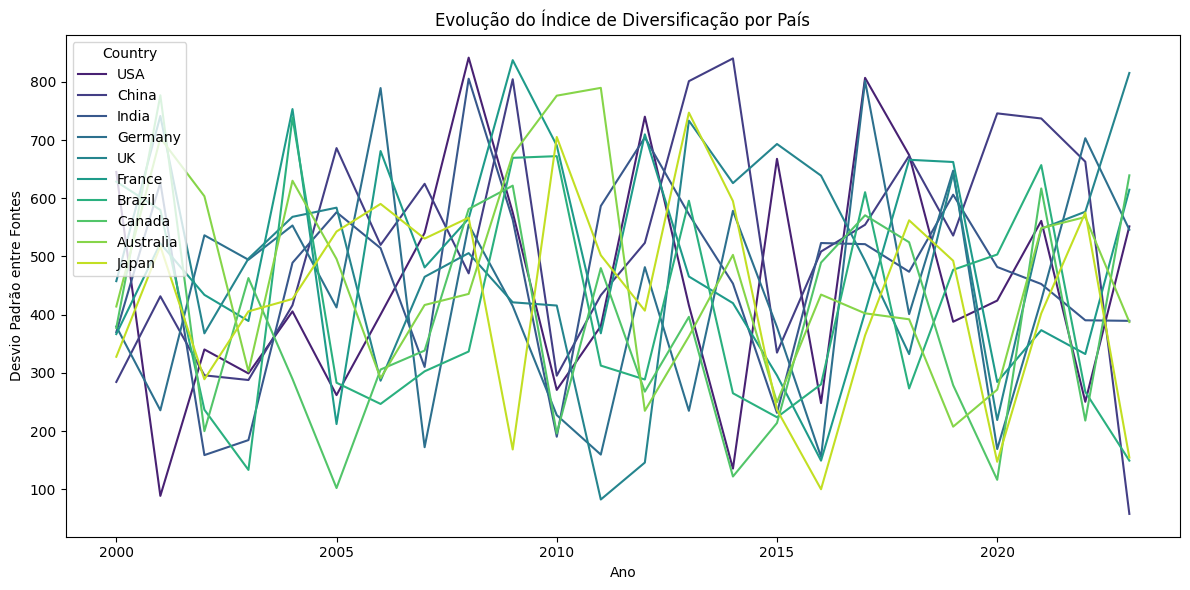

       Country  DiversificationIndex
23         USA            551.757297
47       China             57.637269
71       India            389.409405
95     Germany            546.095953
119         UK            815.383117
143     France            614.783844
167     Brazil            149.201651
191     Canada            639.480187
215  Australia            387.388962
239      Japan            154.483132


In [ ]:
#criação do Índice de Diversificação por País
df['DiversificationIndex'] = df[energy_types].std(axis=1)

#elaboração do gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='DiversificationIndex', hue='Country', palette='viridis')
plt.title('Evolução do Índice de Diversificação por País')
plt.xlabel('Ano')
plt.ylabel('Desvio Padrão entre Fontes')
plt.tight_layout()
plt.show()

print(df[df['Year'] == 2023][['Country', 'DiversificationIndex']])


A tabela apresenta o Índice de Diversificação das fontes de energia renovável em 2023 para diferentes países. Esse índice foi calculado com base no desvio padrão entre as diferentes fontes (Solar, Eólica, Hidroelétrica e Outras Renováveis), e indica o grau de equilíbrio na distribuição da matriz renovável:

Índices mais altos refletem uma maior variabilidade entre as fontes utilizadas — ou seja, o país depende mais fortemente de uma ou duas fontes específicas.

Índices mais baixos indicam uma matriz mais equilibrada, com distribuição mais uniforme entre as diferentes fontes.

Principais conclusões:
Reino Unido (815), Canadá (639), França (614) e Alemanha (546) apresentam os maiores índices, sugerindo que suas matrizes são mais concentradas em algumas fontes específicas de energia renovável., como por exemplo, o gráfico acima de fonte por país, aponta para uma grande dependência do Reino Unido por energia hidrelétrica em 2023.

Por outro lado, China (57) e Brasil (149) apresentam índices significativamente menores, indicando uma maior diversificação nas fontes renováveis utilizadas.

Índia e Austrália têm valores intermediários (~387–389), o que sugere alguma concentração, mas com certa diversidade.

Os Estados Unidos, embora com alto valor (551), apresentam menor concentração que o Reino Unido, mas ainda indicam dependência de poucas fontes principais.

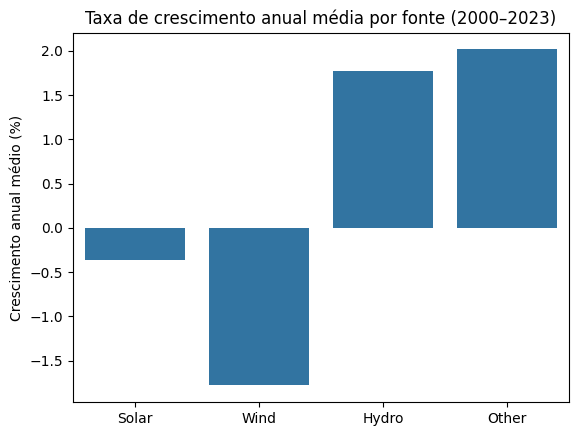

{'Solar': np.float64(-0.003658694585966793), 'Wind': np.float64(-0.01779680445162335), 'Hydro': np.float64(0.017702576949850446), 'Other': np.float64(0.020127509762330575)}


In [ ]:
# agrupamento da produção por fonte
df_grouped = df.groupby("Year")[["SolarEnergy", "WindEnergy", "HydroEnergy", "OtherRenewableEnergy"]].sum()

# função para Taxa de crescimento anual (TCA)
def tca(start, end, years):
    return (end / start) ** (1 / years) - 1

# TCA para 2000 a 2023
years = df_grouped.index.max() - df_grouped.index.min()
tca_values = {
    "Solar": tca(df_grouped["SolarEnergy"].iloc[0], df_grouped["SolarEnergy"].iloc[-1], years),
    "Wind": tca(df_grouped["WindEnergy"].iloc[0], df_grouped["WindEnergy"].iloc[-1], years),
    "Hydro": tca(df_grouped["HydroEnergy"].iloc[0], df_grouped["HydroEnergy"].iloc[-1], years),
    'Other': tca(df_grouped["OtherRenewableEnergy"].iloc[0], df_grouped["OtherRenewableEnergy"].iloc[-1], years)
}

# plotando gráfico
sns.barplot(x=list(tca_values.keys()), y=[v*100 for v in tca_values.values()])
plt.ylabel("Crescimento anual médio (%)")
plt.title("Taxa de crescimento anual média por fonte (2000–2023)")
plt.show()

print(tca_values)

Com o gráfico de TCA, buscamos identificar o índice de crescimento das fontes de energia. Porém, o que descobrimos, foi que, nesses países, não houve um aumento considerável da geração de energia renovável.

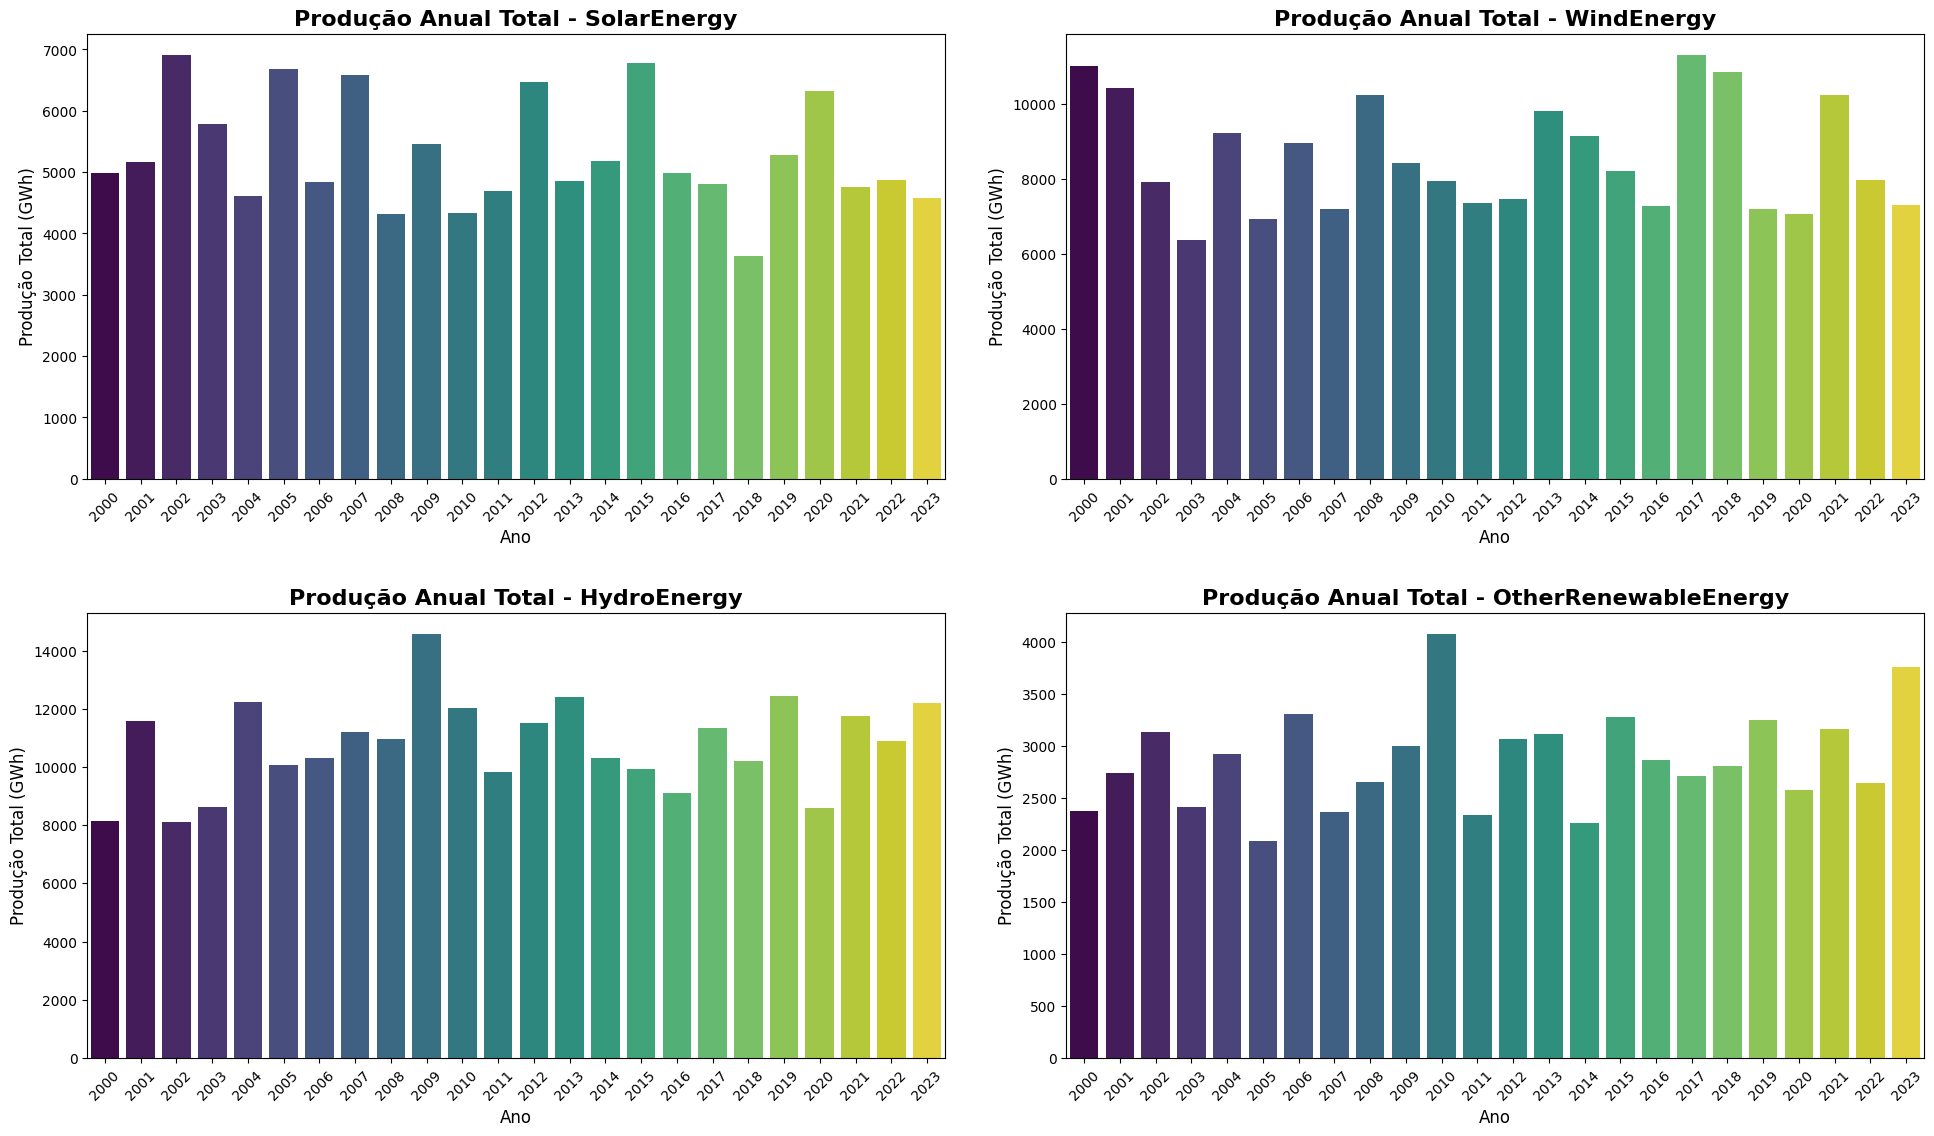

In [ ]:
# agrupando os dados por ano e somando os dados de cada fonte
# surge um dataframe onde cada linha é um ano e cada coluna é a produção total daquela fonte
df_yearly_total = df.groupby('Year')[['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy']].sum()

# lista das fontes de energia
energy_sources = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy']

# criação a grade de gráficos
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# facilitar loop
axes = axes.flatten()

# for loop para criar um gráfico de barras para cada fonte de energia
for i, source in enumerate(energy_sources):
    ax = axes[i]

    #criando os gráficos
    sns.barplot(
        x=df_yearly_total.index,
        y=df_yearly_total[source],
        hue = df_yearly_total.index,
        ax=ax,
        palette='viridis',
        legend = False
    )

    # personlaização
    ax.set_title(f'Produção Anual Total - {source}', fontsize=16, fontweight='bold')
    ax.set_ylabel('Produção Total (GWh)', fontsize=12)
    ax.set_xlabel('Ano', fontsize=12)

    # evitar sobreposição de rótulo
    ax.tick_params(axis='x', rotation=45)

# ajuste do layout para que os gráficos não se sobreponham
plt.tight_layout(pad=3.0)

# plotando
plt.show()


Para confirmar a hipótese levantada com o gráfico anterior, da Taxa de Crescimento Anual, foi criado um gráfico de barras que traz a geração renovável acumulada de todos os países para cada fonte por ano. Assim, fica visualmente claro que, de fato, obtivemos um crescimento significativo de produção ao longo do período analisado, porém, apesar de picos durante o período, as fontes tiveram um valor agregado que devido à uma queda brusca após 2020, regrediu a números abaixo dos iniciais. Apesar de podermos procurar respostas nos números, isso pode ser derivado de fatores externos, como por exemplo, mudanças de estratégias energéticas dos países analisados.

Somando os dois gráficos e o valor do índice, descobrimos que a energia hidrelétrica teve um aumento gradual de aproximadamente 1,8% ao ano. Outras fontes não especificadas tiveram um crescimento de 2,01% ao ano. Já a energia solar e eólica, reduziram a geração em 0,37% e 1,78%, respectivamente.

## Matriz de Correlação

A matriz de correlação nos ajuda a compreender a relação entre múltiplas variáveis.

Matriz de Correlação (Tabela):
                      SolarEnergy  WindEnergy  HydroEnergy  \
SolarEnergy              1.000000   -0.046603    -0.063792   
WindEnergy              -0.046603    1.000000     0.047107   
HydroEnergy             -0.063792    0.047107     1.000000   
OtherRenewableEnergy    -0.041514    0.011408     0.104650   
TotalRenewableEnergy     0.311422    0.557309     0.739133   
DiversificationIndex    -0.221558    0.367999     0.821843   

                      OtherRenewableEnergy  TotalRenewableEnergy  \
SolarEnergy                      -0.041514              0.311422   
WindEnergy                        0.011408              0.557309   
HydroEnergy                       0.104650              0.739133   
OtherRenewableEnergy              1.000000              0.250032   
TotalRenewableEnergy              0.250032              1.000000   
DiversificationIndex             -0.099093              0.684912   

                      DiversificationIndex  
SolarEnergy 

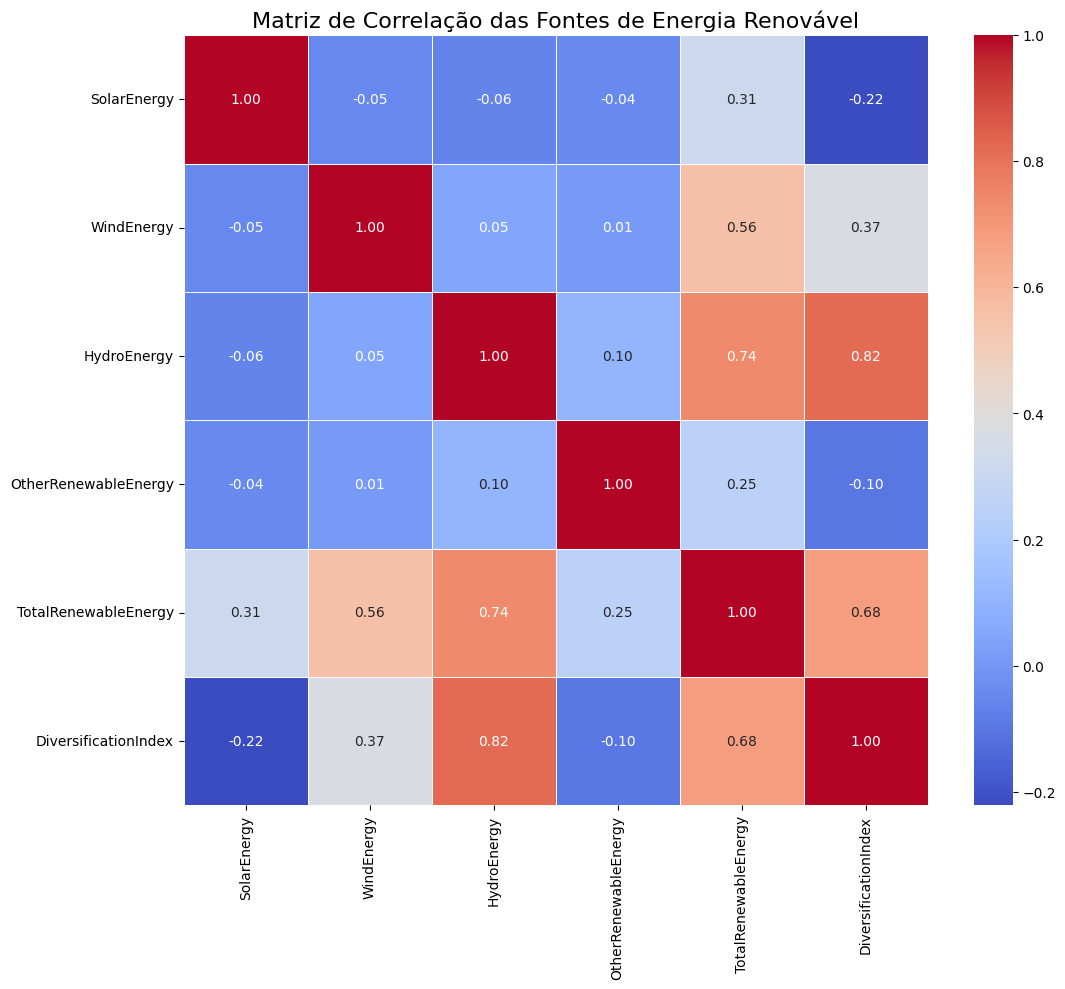

In [ ]:
# selecionar apenas as colunas numéricas para o cálculo
numeric_df = df.select_dtypes(include='number')
# remoção do ano e o país para focar nas relações entre as fontes de energia
if 'Year' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['Year'])
if 'Country' in numeric_df.columns: # Embora não seja numérico, é uma boa prática
    numeric_df = numeric_df.drop(columns=['Country'])


# cálculo da Matriz de Correlação
correlation_matrix = numeric_df.corr()

# exibir a matriz como uma tabela
print("Matriz de Correlação (Tabela):")
print(correlation_matrix)
print("\n" + "="*50 + "\n")


# visualizar a Matriz como um Heatmap
print("Visualização da Matriz de Correlação (Heatmap):")
plt.figure(figsize=(12, 10))

# uso do heatmap do seaborn
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)

plt.title('Matriz de Correlação das Fontes de Energia Renovável', fontsize=16)
plt.show()

A matriz de correlação evidencia que a fonte mais fortemente relacionada à produção total de energia renovável é a hidroelétrica (HydroEnergy), com um coeficiente de 0.74, indicando sua dominância na matriz energética dos países analisados. A energia eólica (WindEnergy) também apresenta uma correlação moderada positiva com o total (0.56), sugerindo seu papel relevante e em crescimento. Por outro lado, energia solar (0.31) e outras fontes renováveis (0.25) demonstram correlações mais fracas, o que pode indicar menor participação relativa ou distribuição desigual entre os países. As correlações baixas ou negativas entre as fontes individuais sugerem que, em geral, os países tendem a investir mais fortemente em uma ou duas fontes predominantes, ao invés de adotar uma diversificação energética ampla. Esse cenário abre espaço para investigações sobre a viabilidade e os desafios da diversificação das matrizes energéticas renováveis ao redor do mundo.

Outro ponto muito interessante que essa matriz traz é que, com a inclusão do DiversificationIndex, podemos tirar conclusões interessantes:

O principal insight é que, segundo a matriz, a geração hidrelétrica é o oposto da diversificação. A correlação de 0,82 aponta para uma alta dependência da geração hidrelétrica em países com desvio padrão alto no quesito da diversificação da matriz, sendo o principal fator entre os analisados para uma matriz energética renovável mais homogênea.

Por outro lado, a correlação negativa com a energia solar aponta para uma matriz mais diversificada quando há crescimento dessa fonte de energia. É uma força de equilíbrio.

## Tratamento de Valores Nulos e Identificação de Outliers

O dataset escolhido original não possui valores nulos ou outliers. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
# verificação da presença de valores nulos no dataset original
print("Valores nulos no dataset por atributo:")
df.isnull().sum()

Valores nulos no dataset por atributo:


,0
Year,0
Country,0
SolarEnergy,0
WindEnergy,0
HydroEnergy,0
OtherRenewableEnergy,0
TotalRenewableEnergy,0
DiversificationIndex,0


Como já era esperado, nosso dataset não possui nenhum valor nulo.

In [ ]:
#outliers
#definição da lista de colunas numéricas que queremos analisar
variaveis_numericas = df.select_dtypes(include=np.number).columns.tolist()

# procurando por outliers em cada variável
z_scores = np.abs(zscore(df[variaveis_numericas]))
outliers = (z_scores > 3).sum(axis=0)
print("Outliers por variável:")
print(outliers)

Outliers por variável:
[0 0 0 0 0 0 0]


Também não encontramos outliers nas variáveis analisadas.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

## One-Hot Encoding

In [ ]:
# === 2. ONE-HOT ENCODING (se houver categorias como 'Country') ===
cat_cols = ['Country'] if 'Country' in df.columns else []
if cat_cols:
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    print("One-hot applied on:", cat_cols)
else:
    print("No categorical columns to OHE (or not needed).")

One-hot applied on: ['Country']


Como os algoritmos de Machine Learning só entendem números, preparando o terreno para o modelo de treino e teste, é importante que façamos a etapa de Hot-Enconding durante o Pré Processamento.

In [ ]:
# FEATURE ENGINEERING
energy_cols = [c for c in df.columns if any(x in c.lower() for x in ['solar','wind','hydro','other'])]

if 'TotalRenewableEnergy' in df.columns and energy_cols:
    for c in energy_cols:
        df[c + '_share'] = df[c] / df['TotalRenewableEnergy']

    def shannon_entropy_row(row, share_cols):
        probs = row[share_cols].values.astype(float)
        probs = probs[probs > 0]
        if probs.size == 0:
            return 0.0
        probs = probs / probs.sum()
        return -(probs * np.log(probs)).sum()

    share_cols = [c + '_share' for c in energy_cols]
    df['diversity_index'] = df.apply(lambda r: shannon_entropy_row(r, share_cols), axis=1)
else:
    print("Não foi possível criar shares/diversity: verifique nomes de colunas.")

if 'Country' in df.columns:
    df = df.sort_values(['Country','Year'])
    LAGS = [1,2,3]
    for lag in LAGS:
        df[f'Total_lag_{lag}'] = df.groupby('Country')[target_col].shift(lag)
    df[f'Total_roll_mean_3'] = df.groupby('Country')[target_col].shift(1).rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)
else:
    df = df.sort_values('Year')
    df['Total_lag_1'] = df[target_col].shift(1)
    df['Total_lag_2'] = df[target_col].shift(2)

df['Year_norm'] = (df['Year'] - df['Year'].min()) / (df['Year'].max() - df['Year'].min())

df = df.dropna(subset=[c for c in df.columns if c.startswith('Total_lag_')])
print("Shape after FE:", df.shape)

Shape after FE: (238, 24)


In [ ]:
# 4. FEATURE LIST & QUICK SCALING

drop_cols = ['Year']
if 'Total_calc' in df.columns:
    drop_cols += ['Total_calc']

features = [c for c in df.select_dtypes(include=['int64','float64']).columns if c not in drop_cols + [target_col]]
print("Candidate features:", features)

# quick scaling para plots (não substitui pipeline)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_quick = scaler.fit_transform(df[features])

Candidate features: ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy', 'DiversificationIndex', 'SolarEnergy_share', 'WindEnergy_share', 'HydroEnergy_share', 'OtherRenewableEnergy_share', 'diversity_index', 'Total_lag_1', 'Total_lag_2', 'Year_norm']


## Preparação e Engenharia de Atributos

As seguintes etapas de preparação foram aplicadas:  
- Tratamento de valores ausentes (substituição por zero ou interpolação).  
- Normalização/Padronização da variável de produção para comparações entre países.  
- Criação de novas variáveis derivadas:  
  - **Participação percentual por fonte** em relação à matriz total do país.  
  - **Índice de diversificação energética** (ex.: Shannon Index).  
  - **Taxa de crescimento anual composto (CAGR)** por país e fonte.  

**Validação cruzada**:  
Para modelos de previsão, utilizou-se **time-based split** (divisão temporal), garantindo que dados futuros não contaminem o treino.  

**Seleção de atributos**:  
Foram priorizadas variáveis relacionadas ao tempo (ano), país e tipo de energia.  

## Normalização ou Padronização

A normalização coloca todos os dados em um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante. Não permitindo que as análises sejam enviesadas pelas escalas dos dados.

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Como os dados de entrada tinham escalas muito diferentes, foi realizada a normalização para que o algoritmo leia tudo da mesma forma.

In [ ]:
# 5. TIME-BASED SPLIT
# definir limites temporais conforme seu dataset; ajuste as datas
train_end = 2015
val_end = 2018

train_df = df[df['Year'] <= train_end]
val_df = df[(df['Year'] > train_end) & (df['Year'] <= val_end)]
test_df = df[df['Year'] > val_end]

features = ['Year', 'DiversificationIndex'] + [col for col in df.columns if 'Country_' in col]


X_train = train_df[features].reset_index(drop=True)
y_train = train_df[target_col].reset_index(drop=True)

X_val = val_df[features].reset_index(drop=True)
y_val = val_df[target_col].reset_index(drop=True)

X_test = test_df[features].reset_index(drop=True)
y_test = test_df[target_col].reset_index(drop=True)

print("Train/Val/Test shapes:", X_train.shape, X_val.shape, X_test.shape)

Train/Val/Test shapes: (158, 11) (30, 11) (50, 11)


In [ ]:
# 6. PIPELINES & BASELINES
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# criar pipeline padrão (scaler + model)
def make_pipeline(model):
    return Pipeline([('scaler', StandardScaler()), ('model', model)])

models = {
    'Linear': make_pipeline(LinearRegression()),
    'Ridge': make_pipeline(Ridge(alpha=1.0, random_state=RANDOM_SEED)),
    'Lasso': make_pipeline(Lasso(alpha=0.01, random_state=RANDOM_SEED))
}

results = {}
for name, pipe in models.items():
    t0 = time.time()
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_val)
    t1 = time.time()
    results[name] = {
        'MAE': np.mean(np.abs(preds - y_val)),
        'MSE': mean_squared_error(y_val, preds),
        'RMSE': np.sqrt(mean_squared_error(y_val, preds)),
        'R2': r2_score(y_val, preds),
        'fit_time_s': t1 - t0
    }

import pandas as pd
pd.DataFrame(results).T.sort_values('RMSE')

,MAE,MSE,RMSE,R2,fit_time_s
Ridge,384.650070,230814.008996,480.431066,0.346907,0.006162
Lasso,385.769598,231527.631640,481.173183,0.344888,0.007517
Linear,385.784112,231537.470688,481.183406,0.344860,0.009682


In [ ]:
# 7. HYPERPARAM TUNING
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf_pipe = Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor(random_state=RANDOM_SEED))])

param_dist = {
    'model__n_estimators': randint(50, 300),
    'model__max_depth': randint(3, 20),
    'model__min_samples_leaf': randint(1, 8)
}

rs = RandomizedSearchCV(rf_pipe, param_distributions=param_dist, n_iter=20, cv=3,
                        scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=RANDOM_SEED, verbose=1)
rs.fit(X_train, y_train)

best_rf = rs.best_estimator_
print("Best params:", rs.best_params_)

# avaliar no val e test
y_val_pred = best_rf.predict(X_val)
y_test_pred = best_rf.predict(X_test)
print("Val RMSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__n_estimators': 141}
Val RMSE: 489.6925608350545
Test RMSE: 479.8277883164338


## Modelagem e Treinamento

Foram testados diferentes algoritmos de regressão:  
- **Baseline**: regressão linear simples (tendência temporal).  
- **Modelos comparativos**: regressão polinomial, Random Forest Regressor e ARIMA para previsão temporal.  

**Justificativa das escolhas**:  
- O baseline (regressão linear) mostra a tendência média de crescimento.  
- Modelos de árvore foram testados para capturar padrões não lineares.  
- ARIMA foi avaliado por ser específico para séries temporais.  

**Otimização de hiperparâmetros**:  
Foram ajustados parâmetros como ordem do ARIMA (p,d,q), profundidade das árvores e número de estimadores, buscando reduzir o erro preditivo.  


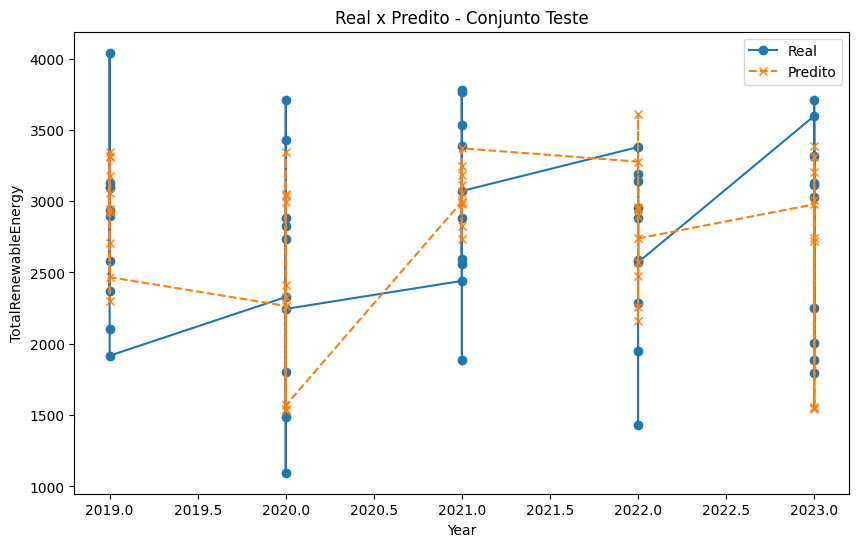

In [ ]:
# 8. PLOT REAL x PREDITO
best_model = best_rf if 'best_rf' in globals() else models['Linear']
y_pred = best_model.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(test_df['Year'].values, y_test.values, marker='o', label='Real')
plt.plot(test_df['Year'].values, y_pred, marker='x', linestyle='--', label='Predito')
plt.xlabel('Year'); plt.ylabel(target_col)
plt.title('Real x Predito - Conjunto Teste')
plt.legend(); plt.show()

## Avaliação dos Resultados

As métricas utilizadas foram **RMSE (Root Mean Squared Error)** e **MAPE (Mean Absolute Percentage Error)**, adequadas para problemas de regressão e previsão de séries temporais.  

**Resultados principais**:  
- A regressão linear apresentou desempenho básico, capturando apenas tendências gerais.  
- O Random Forest reduziu o erro em relação ao baseline, mas teve maior tempo de execução.  
- O ARIMA apresentou boa performance em séries univariadas, especialmente para países com histórico mais completo.  

**Comparação entre modelos**:  
- Modelos simples (baseline) são úteis para explicabilidade.  
- Modelos mais complexos aumentam a precisão, mas exigem maior esforço computacional.  

# Conclusão

**Principais achados**:  
- Foi possível identificar um crescimento acelerado das fontes solar e eólica, enquanto a hidrelétrica se manteve mais estável.  
- O índice de diversificação energética mostrou que países como Alemanha e China avançaram de forma mais consistente.  
- O modelo Random Forest apresentou melhor equilíbrio entre complexidade e acurácia, reduzindo erros em relação ao baseline.  